In [1]:
# Library import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Loading dataset
df = pd.read_csv('Obesity Classification.csv')
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [5]:
# drop first column

#df = df.drop(['ID'], axis =1)

In [6]:
df.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


### Data preprocessing

In [7]:
df.isnull().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [8]:
df.shape

(108, 7)

In [9]:
# converting cat. variable('Gender') to num. variable
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,Normal Weight
1,2,30,0,160,60,22.5,Normal Weight
2,3,35,1,180,90,27.3,Overweight
3,4,40,0,150,50,20.0,Underweight
4,5,45,1,190,100,31.2,Obese


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    int8   
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), int8(1), object(1)
memory usage: 5.3+ KB


In [11]:
df['Label'].value_counts()

Label
Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: count, dtype: int64

In [12]:
# using Label encoder to encode the dependent variable('Label')

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Label'] = encoder.fit_transform(df['Label'])

In [13]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,0
1,2,30,0,160,60,22.5,0
2,3,35,1,180,90,27.3,2
3,4,40,0,150,50,20.0,3
4,5,45,1,190,100,31.2,1


In [14]:
df.describe()

,ID,Age,Gender,Height,Weight,BMI,Label
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,0.518519,166.574074,59.490741,20.549074,1.787037
std,31.917939,24.720620,0.501986,27.873615,28.856233,7.583818,1.260848
min,1.000000,11.000000,0.000000,120.000000,10.000000,3.900000,0.000000
25%,28.750000,27.000000,0.000000,140.000000,35.000000,16.700000,0.000000
50%,56.500000,42.500000,1.000000,175.000000,55.000000,21.200000,2.000000
75%,83.250000,59.250000,1.000000,190.000000,85.000000,26.100000,3.000000
max,110.000000,112.000000,1.000000,210.000000,120.000000,37.200000,3.000000


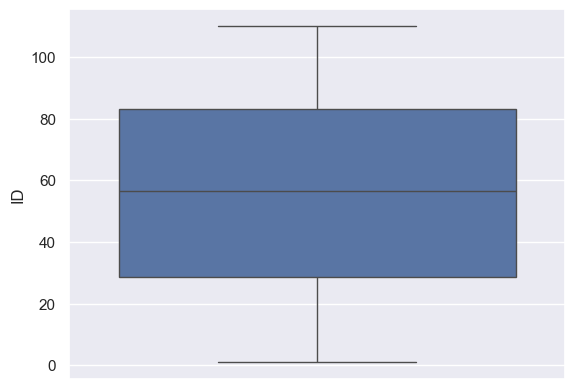

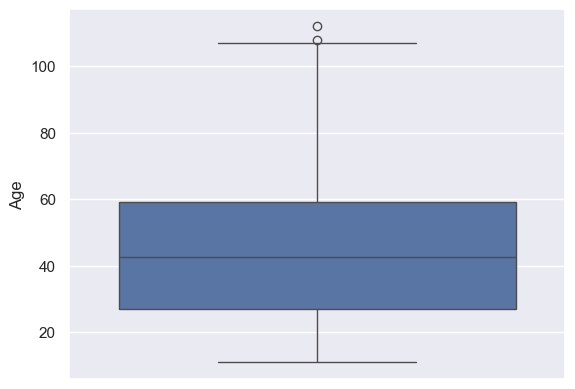

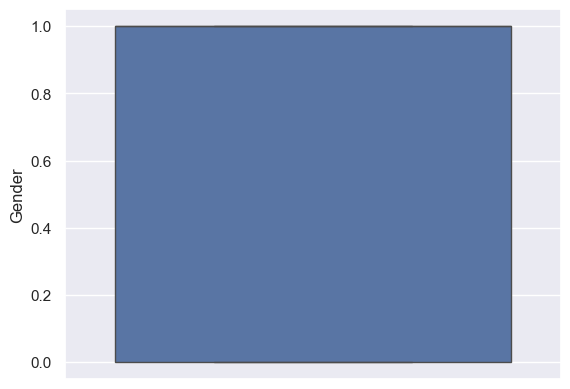

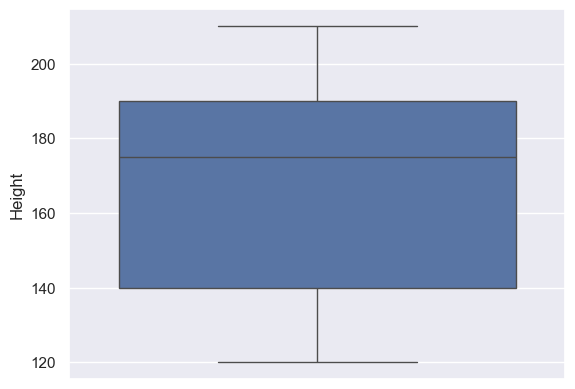

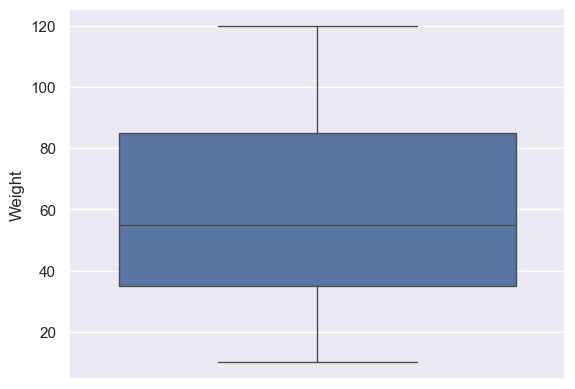

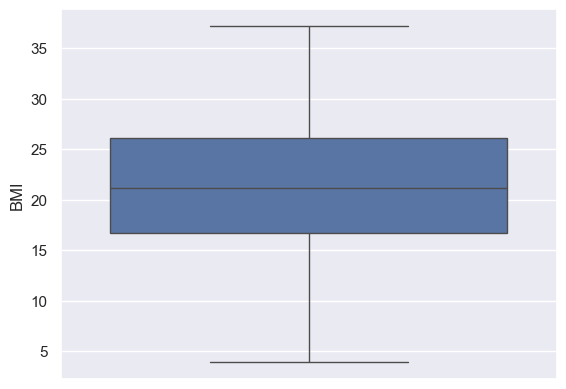

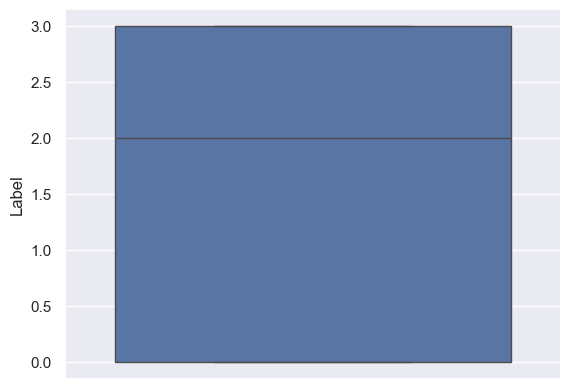

In [15]:
# Checking outliers
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()

for i in list(df.select_dtypes(exclude =['object']).columns)[0:]:
    boxplots(i)

### Outlier treatment

In [16]:
# Finding the IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

print("Percentile25 :", Q1)
print("Percentile75 :", Q3)
print("InterQuartileRange :", IQR)

Percentile25 : 27.0
Percentile75 : 59.25
InterQuartileRange : 32.25


In [17]:
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

print("Upper Limit :", upper_limit)
print("Lower Limit :", lower_limit)

Upper Limit : 107.625
Lower Limit : -21.375


In [18]:
df['Age'] = np.where(df['Age'] > upper_limit,
                                             upper_limit,
                                              np.where(df['Age'] < lower_limit,
                                                       lower_limit, 
                                                      df['Age']))

In [19]:
df['Age'].describe()

count    108.000000
mean      46.511574
std       24.607008
min       11.000000
25%       27.000000
50%       42.500000
75%       59.250000
max      107.625000
Name: Age, dtype: float64

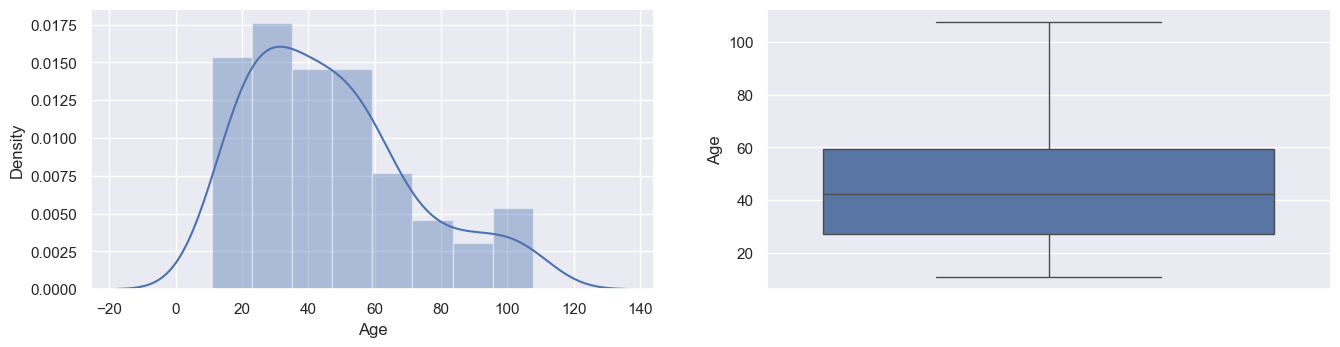

In [20]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Age'])
plt.subplot(2,2,2)
sns.boxplot(df['Age'])

plt.show()

In [21]:
import dtale
dtale.show(df)

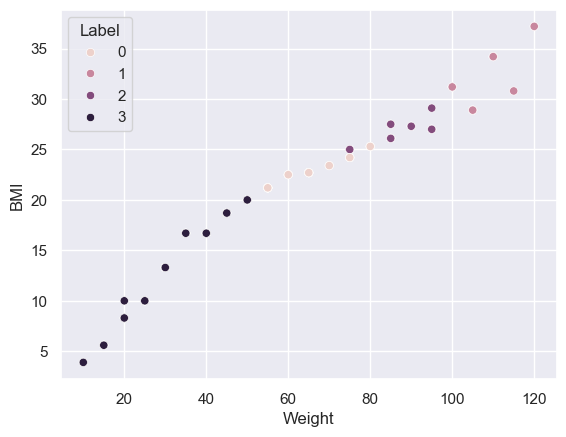

In [22]:
sns.scatterplot(x ='Weight', y='BMI', data=df, hue='Label')
plt.show()

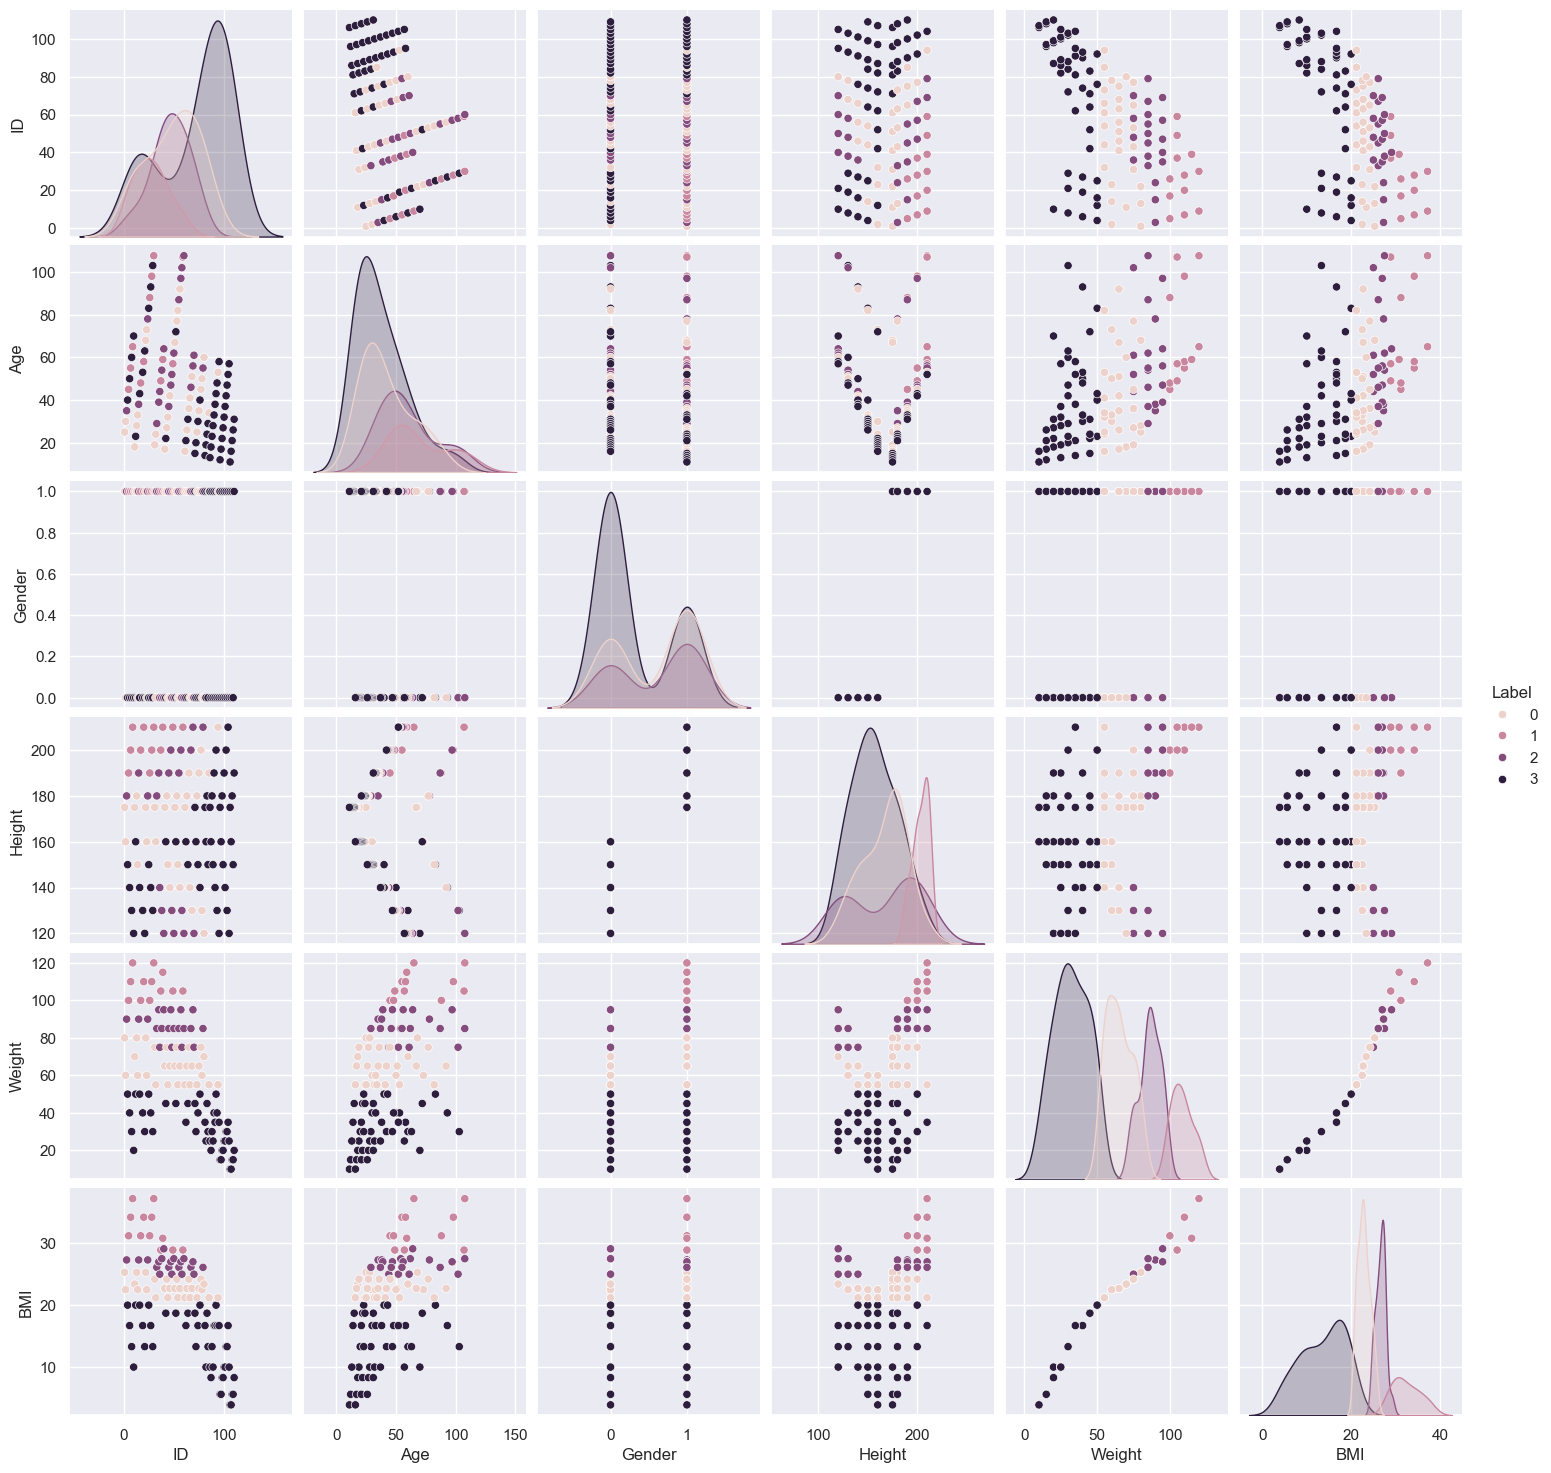

In [23]:
sns.pairplot(data=df, hue='Label')
plt.show()

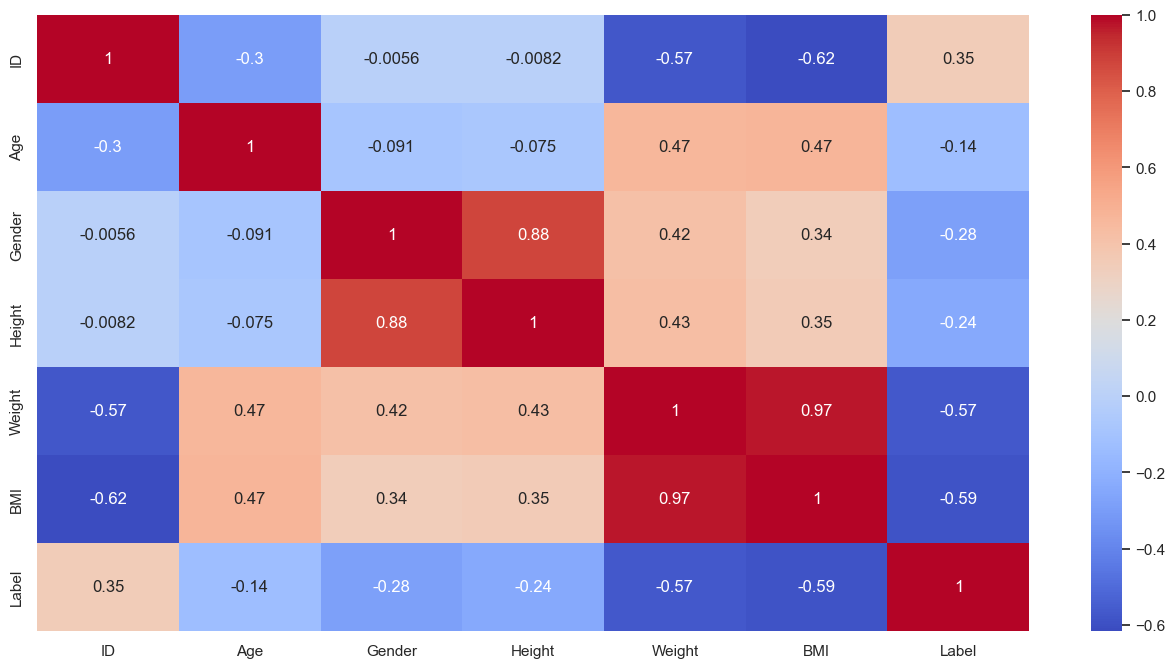

In [24]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

2025-04-22 09:38:49,624 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-22 09:38:49,748 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


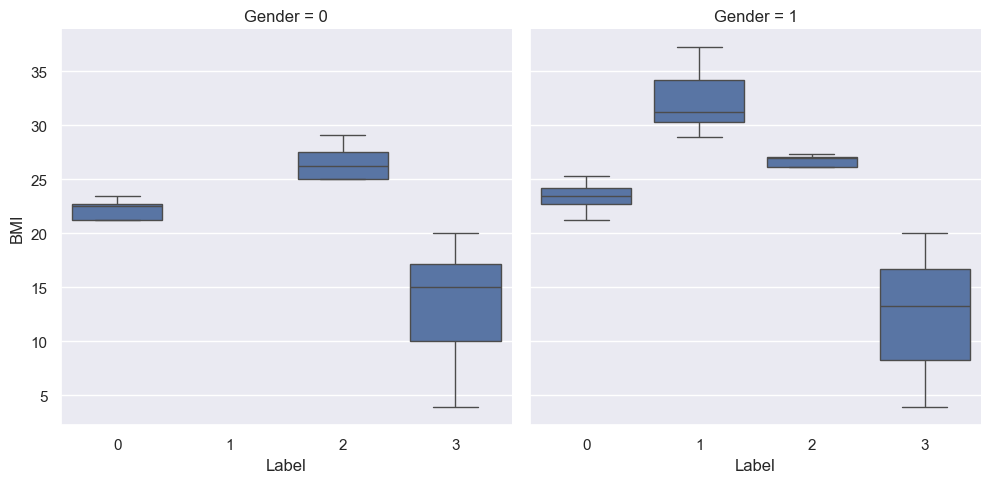

In [25]:
sns.catplot(data=df, x='Label', y='BMI', kind='box', col='Gender')
plt.show()

In [26]:
# split the data into independent and dependent variable
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [27]:
x.head()

,ID,Age,Gender,Height,Weight,BMI
0,1,25.0,1,175,80,25.3
1,2,30.0,0,160,60,22.5
2,3,35.0,1,180,90,27.3
3,4,40.0,0,150,50,20.0
4,5,45.0,1,190,100,31.2


In [28]:
y.head()

0    0
1    0
2    2
3    3
4    1
Name: Label, dtype: int32

In [29]:
df['Label'].value_counts()

Label
3    47
0    29
2    20
1    12
Name: count, dtype: int64

### Imbalance treatement

In [30]:
# Imbalance treatement
import imblearn

In [31]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_over, y_over = ros.fit_resample(x,y)
print("Imbalanced datapoint :", y.value_counts())
print()
print("Balanced datapoint :", y_over.value_counts())

Imbalanced datapoint : Label
3    47
0    29
2    20
1    12
Name: count, dtype: int64

Balanced datapoint : Label
0    47
2    47
3    47
1    47
Name: count, dtype: int64


In [32]:
# split the data into training and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, train_size=0.75,random_state=42,
                                                   stratify=y_over)

### Building Decision Tree Model

In [33]:
from sklearn.tree import DecisionTreeClassifier
# approach 1 = Gini
dtree1 = DecisionTreeClassifier(criterion='gini')
dtree1.fit(x_train, y_train)

# approach 2 = entropy
dtree2 = DecisionTreeClassifier(criterion='entropy')
dtree2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

### Predict the test data

In [34]:
y_pred_dt1_train = dtree1.predict(x_train)
y_pred_dt1_test = dtree1.predict(x_test)


y_pred_dt2_train = dtree2.predict(x_train)
y_pred_dt2_test = dtree2.predict(x_test)

In [35]:
y_pred_dt2_test

array([2, 3, 1, 1, 3, 0, 3, 0, 0, 3, 0, 0, 1, 3, 3, 2, 3, 2, 0, 1, 3, 1,
       0, 3, 1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 2, 3, 2, 3, 3, 0, 2, 2, 2, 1,
       2, 0, 1])

### Evaluate the model

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [37]:
print(classification_report(y_train, y_pred_dt1_train))
print()
print(classification_report(y_test, y_pred_dt1_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        35

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47



In [38]:
print(classification_report(y_train, y_pred_dt2_train))
print()
print(classification_report(y_test, y_pred_dt2_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        35

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47



In [39]:
print(confusion_matrix(y_train, y_pred_dt1_train))
print()
print(confusion_matrix(y_test, y_pred_dt1_test))

[[35  0  0  0]
 [ 0 36  0  0]
 [ 0  0 35  0]
 [ 0  0  0 35]]

[[12  0  0  0]
 [ 0 11  0  0]
 [ 0  0 12  0]
 [ 0  0  0 12]]


In [40]:
print(confusion_matrix(y_train, y_pred_dt2_train))
print()
print(confusion_matrix(y_test, y_pred_dt2_test))

[[35  0  0  0]
 [ 0 36  0  0]
 [ 0  0 35  0]
 [ 0  0  0 35]]

[[12  0  0  0]
 [ 0 11  0  0]
 [ 0  0 12  0]
 [ 0  0  0 12]]


In [41]:
print("Train Accuracy - Gini :",accuracy_score(y_train, y_pred_dt1_train))
print()
print("Test Accuracy - Gini :",accuracy_score(y_test, y_pred_dt1_test))

Train Accuracy - Gini : 1.0

Test Accuracy - Gini : 1.0


In [42]:
print("Train Accuracy - entropy :",accuracy_score(y_train, y_pred_dt2_train))
print()
print("Test Accuracy - entropy :",accuracy_score(y_test, y_pred_dt2_test))

Train Accuracy - entropy : 1.0

Test Accuracy - entropy : 1.0


### Cross Validation - K_Fold_Method

In [43]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(dtree1, x_train, y_train, cv=10)
print(accuracy)
print()
print(accuracy.mean())
print()
print(accuracy.max())

[1.         1.         0.92857143 1.         0.92857143 1.
 1.         1.         1.         1.        ]

0.9857142857142858

1.0


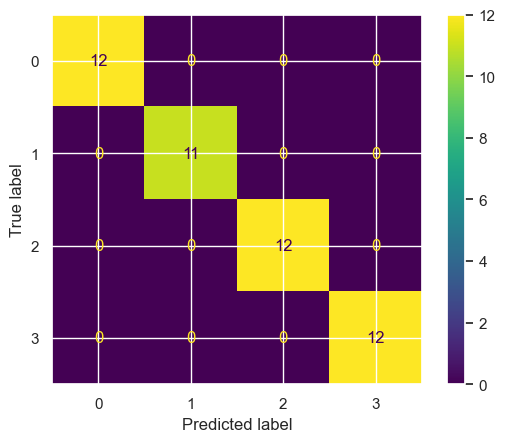

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(dtree1, x_test, y_test)
plt.show()


### Post-prunning

In [45]:
dtree1.feature_importances_

array([0.00217655, 0.05008438, 0.        , 0.        , 0.66901408,
       0.27872498])

In [46]:
pd.DataFrame(index = x.columns, data=dtree1.feature_importances_,
            columns=["Feature Importance"])

,Feature Importance
ID,0.002177
Age,0.050084
Gender,0.000000
Height,0.000000
Weight,0.669014
BMI,0.278725


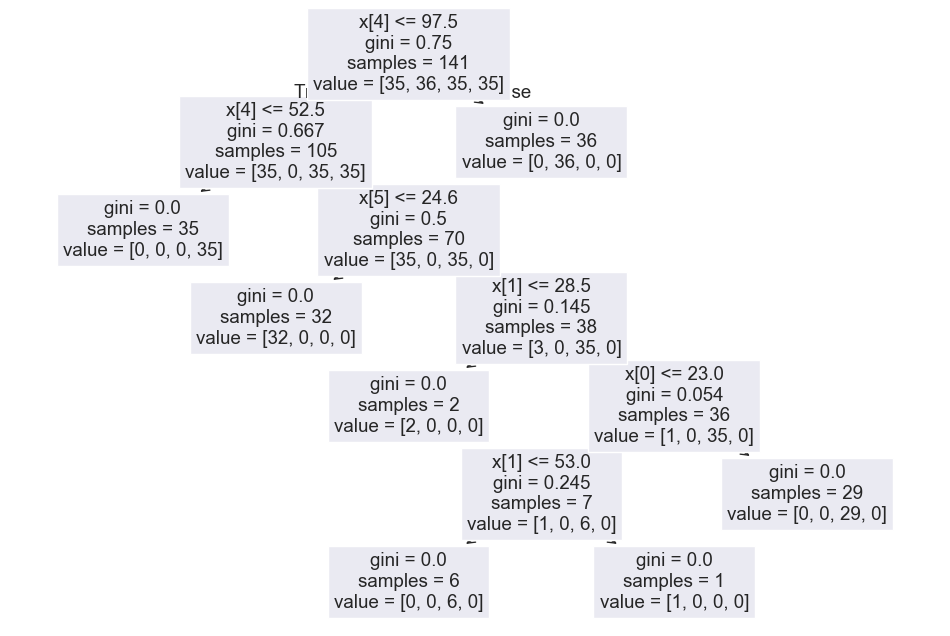

In [47]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dtree1)
plt.show()

In [48]:
y_train.value_counts()

Label
1    36
0    35
2    35
3    35
Name: count, dtype: int64

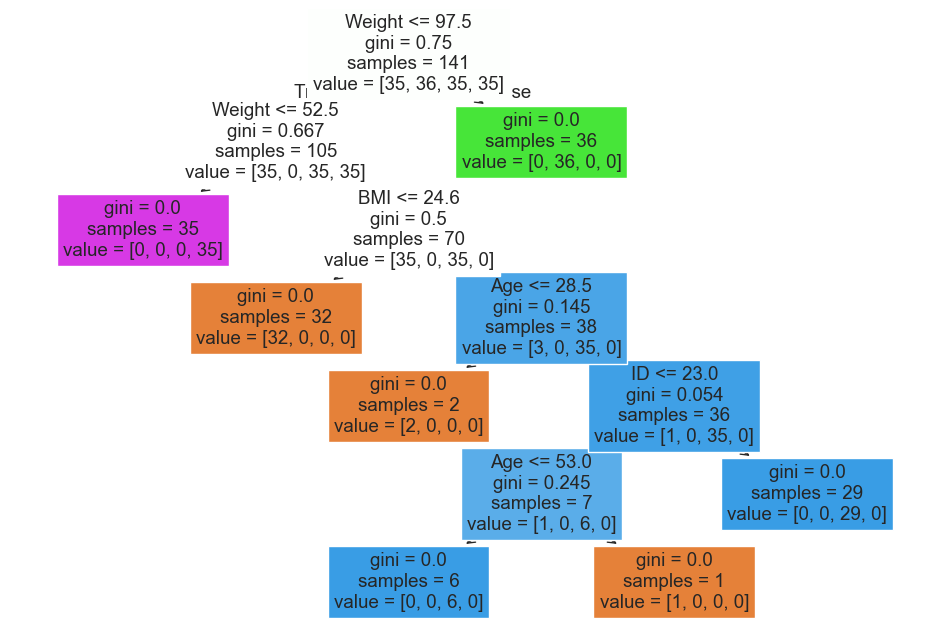

In [49]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dtree1, filled=True, feature_names = x.columns)
plt.show()

In [50]:
# Using hyperparameter in Decision tree to apply post-prunning method
prunned_tree = DecisionTreeClassifier(criterion='gini', max_depth=3)
prunned_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [51]:
# User define function
def report_model(model):
    model_preds = model.predict(x_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    print(accuracy_score(y_test, model_preds))
    print('\n')
    plt.figure(figsize=(12,8), dpi=150)
    plot_tree(model, filled=True, feature_names = x.columns)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       1.00      1.00      1.00        11
           2       0.92      1.00      0.96        12
           3       1.00      1.00      1.00        12

    accuracy                           0.98        47
   macro avg       0.98      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47



0.9787234042553191




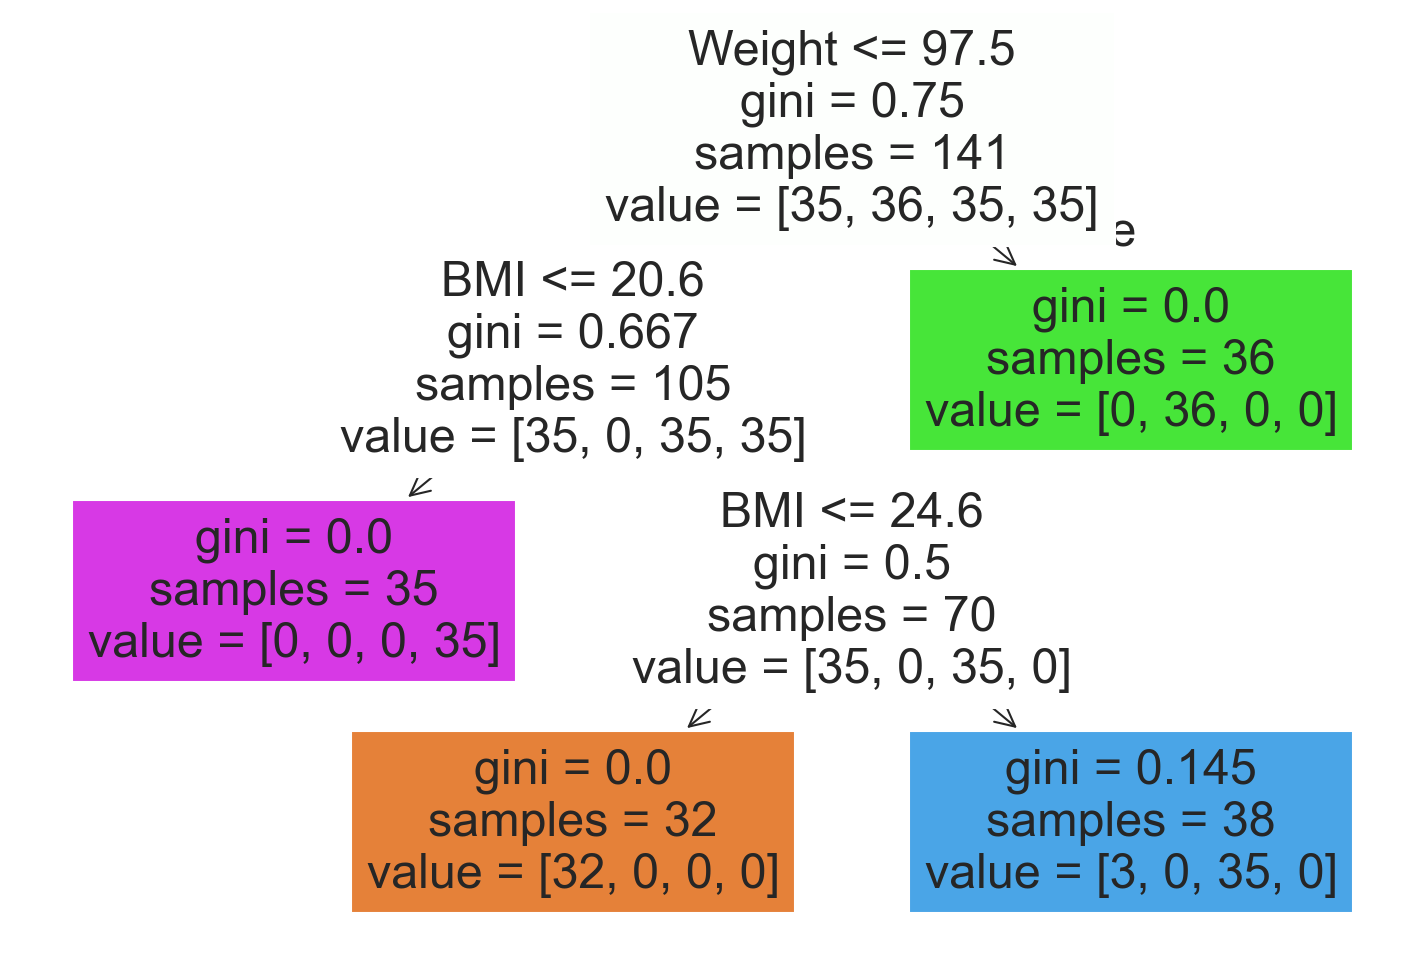

In [52]:
report_model(prunned_tree)
plt.show()

### LogisticRegression

In [56]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

In [57]:
y_pred_train_logit = logit.predict(x_train)
y_pred_test_logit = logit.predict(x_test)

In [58]:
print("Train Accuracy - Logit :",accuracy_score(y_train, y_pred_train_logit))
print()
print("Test Accuracy - Logit :",accuracy_score(y_test, y_pred_test_logit))

Train Accuracy - Logit : 0.7943262411347518

Test Accuracy - Logit : 0.9148936170212766
